# <center><font size=10, color="#7B242F"><u> Random Forests</u> </font>

___

## Auto Dataset Project Using Random Forest Regressor

In [8]:
## ======================================================================
#            Importing the necessary modules and tools
## ======================================================================

import pandas as pd; import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# import DecisionTreeRegressor from sklearn.tree 
from sklearn.ensemble import RandomForestRegressor

# from sklearn.metrics import necessary metrics
from sklearn.metrics import mean_squared_error as MSE


# Set notebook options
# --------------------
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline

In [9]:
auto = pd.read_csv('auto_mpg.csv')
print("*" * 50)
auto.info()
print("*" * 50)
auto.head()

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
**************************************************


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.000,8,307.000,130,3504,12.000,70,1,chevrolet chevelle malibu
1,15.000,8,350.000,165,3693,11.500,70,1,buick skylark 320
2,18.000,8,318.000,150,3436,11.000,70,1,plymouth satellite
3,16.000,8,304.000,150,3433,12.000,70,1,amc rebel sst
4,17.000,8,302.000,140,3449,10.500,70,1,ford torino


In [3]:
auto['horsepower'] = pd.to_numeric(auto.horsepower, errors = 'coerce')
auto.dropna(inplace=True)

# Mapping the origin variable to names
# ------------------------------------

auto['origin'] = auto['origin'].map({1: 'USA',
                                     2: 'Europe',
                                     3: 'Japan'})
# Encoding the origin variable
# ------------------------------
auto = pd.get_dummies(auto, columns = ['origin'], prefix = '', 
                      prefix_sep = '', drop_first=True)
X = auto.drop(['mpg', 'car name'], axis=1)
y = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=3)

In [4]:
# Instantiate a random forests regressor 'rf_reg'
# ----------------------------------------------
rf_reg = RandomForestRegressor(random_state= 1)

# Fit the tree regressor
# ----------------------
rf_reg.fit(X_train, y_train)

# Generate predictions
# ---------------------
preds = rf_reg.predict(X_test)

# Compute the rmse
rmse = np.sqrt(MSE(preds, y_test))


# Print the rmse metric
# -----------------------
print("Test set RMSE: {:.2f}".format(rmse))

Test set RMSE: 2.58


## <center><font size=6, color="#7B249F"><u> Feature Importance</u> </font>

### Plotting The Variable Importance

In [5]:
features = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'Japan', 'USA']
for name, score in zip(features, rf_reg.feature_importances_):
    print("{0:18}: {1:.3f}".format(name, score))

cylinders         : 0.066
displacement      : 0.375
horsepower        : 0.135
weight            : 0.253
acceleration      : 0.028
model year        : 0.137
Japan             : 0.004
USA               : 0.002


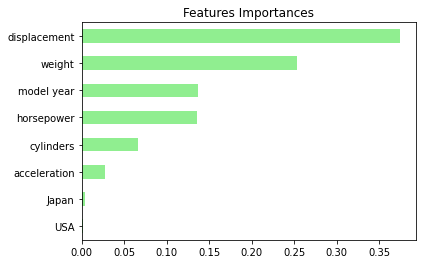

In [6]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf_reg.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(color='lightgreen',
                        kind='barh')
plt.title('Features Importances')
plt.show()

___

# <center><font size=10, color="#7B242F"><u> Random Forests Hyperparameter Tuning</u> </font>

## Random Forest Hyperparameter Tuning using Grid Seach CV



### Hyperparameter Tuning for Auto Dataset Project

In [7]:
## ==========================================================
#   Random Forest Regressor Hyperparameter tuning In Action
## ==========================================================

# Import GridSearchCV
#----------------------
from sklearn.model_selection import GridSearchCV

# Instantiate a tree regressor
# ----------------------------
rf_reg = RandomForestRegressor(random_state= 1)

# Define the dictionary 'params_rf_reg'
params_rf_reg = {
    'n_estimators': [100, 350, 500], 
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 30]
}

# Import GridSearchCV
# ------------------------
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf_reg
grid_rf_reg = GridSearchCV(estimator=rf_reg,
                       param_grid= params_rf_reg,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=1,
                       n_jobs=8)

 # Fit 'grid_rf_reg' to the training set
grid_rf_reg.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_rf_reg.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = np.sqrt(MSE(y_test, y_pred))

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/home/khaled/VSWorkArea/envs/Ai/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/khaled/VSWorkArea/envs/Ai/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/khaled/VSWorkArea/envs/Ai/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

Test RMSE of best model: 2.526
